### Stochastic Inventory Control Model 

In [1]:
import numpy as np
from cvxpy import *

In [2]:
# production quanity
q = Variable(1)

# quantity sold at retail for each scenario
y = Variable(5)

# quantity sold at discount for each scenario
z = Variable(5)

# demand for each scenario
d = np.array([10, 20, 30, 40, 50])

# probability of scenarios
p = np.array([.1, .15, .3, .25, .2])

# Production Unit cost 
c = 10

# retail price
r = 15

# discount price 
dp = 5

# capacity xbar
xcap = 75

In [3]:
# Objective function

of = c * q + r * -(p.T * y) + dp * -(p.T * z)

In [4]:
#constraints
const = [q >= 0,
        q <= xcap,
        -q * np.ones(5) + y +z <= 0, 
        y <= d,
        y >= 0,
        z >= 0]


In [5]:
prob1 = Problem(Minimize(of), const)
sol = prob1.solve()

#### Optimal Solution:

In [6]:
print("Optimal Value : {}".format(sol))

Optimal Value : -114.9999999940651


### Absolute Deviation Regression Model (Robust Regression)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# modified the regression.dat file to use read_table command
data = pd.read_table('regression.dat', delim_whitespace = True, header = -1)

In [9]:
# Getting x and y values
n = 100
x = data[data.columns[0:2]].values
y = data[data.columns[2]].values

In [10]:
b = Variable(2 + 1) # 2 features and intercept b_o

In [11]:
z = Variable(n)

In [12]:
cons1 = [z[i] >= y[i] - (b[0] + b[1] * x[i, 0] + b[2] * x[i, 1]) for i in range(n)]
cons2 = [-z[i] <= y[i] - (b[0] + b[1] * x[i, 0] + b[2] * x[i, 1]) for i in range(n)]
cons = cons1 + cons2

In [13]:
o_f = sum(z)

In [14]:
prob = Problem(Minimize(o_f), cons)
result = prob.solve()

In [15]:
b_val = b.value

In [16]:
print("Optimal solution:{}".format(result))

Optimal solution:26.52066011040318


In [17]:
print("Betas:{}".format(b_val))

Betas:[[ 0.40359329]
 [ 0.18501548]
 [-0.19953275]]


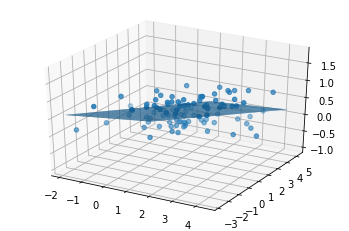

In [23]:
b_sol = b.value
y_fit = np.ones(n) * \
b_sol[0, 0] + x[:, 0] * b_sol[1, 0] + x[:, 1] * b_sol[2, 0]
x1_max = np.max(x[:, 0])
x1_min = np.min(x[:, 0])
x2_max = np.max(x[:, 1])
x2_min = np.min(x[:, 1])
mesh_x1, mesh_x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
np.arange(x2_min, x2_max, 0.1))
# calculate corresponding z values
plane_y = b_sol[0, 0] + mesh_x1 * b_sol[1, 0] + mesh_x2 * b_sol[2, 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
ax.plot_surface(mesh_x1, mesh_x2, plane_y)